Problem 1: Screenshots from local Macbook

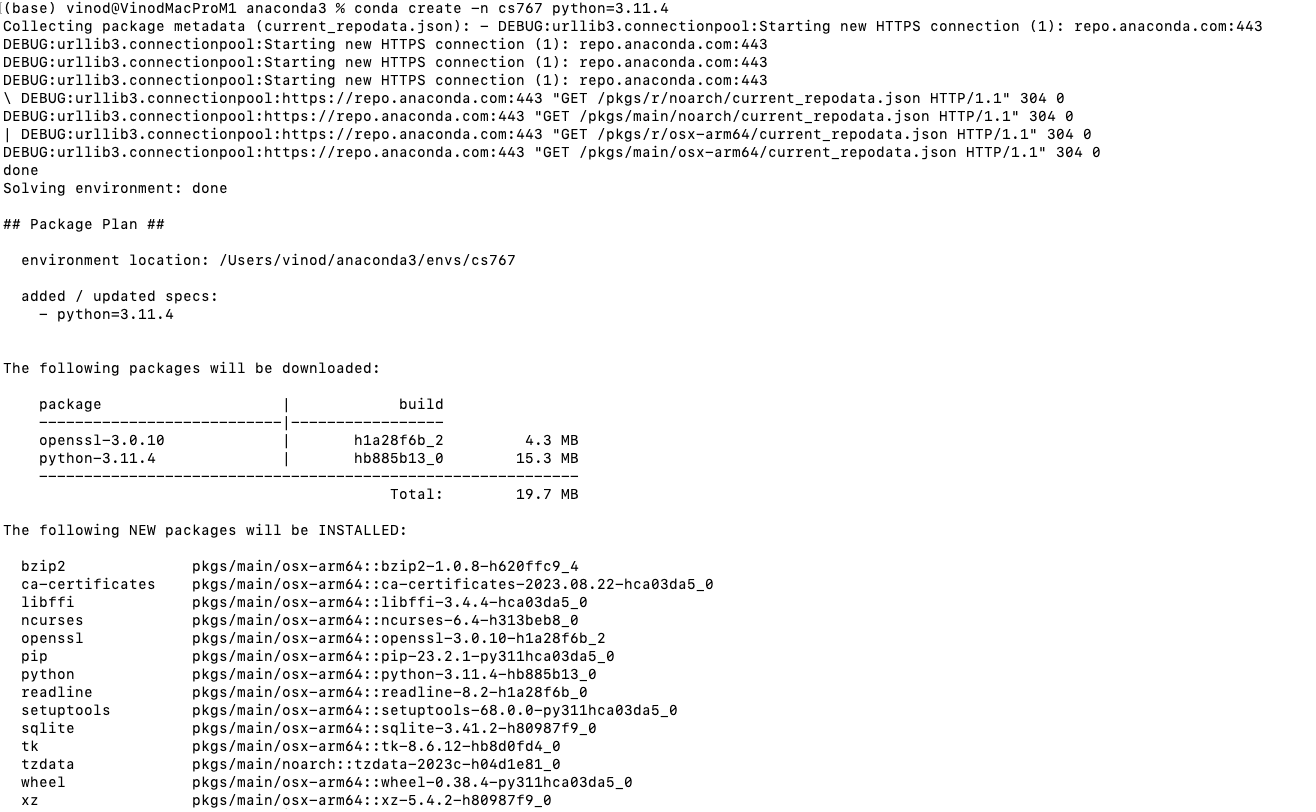

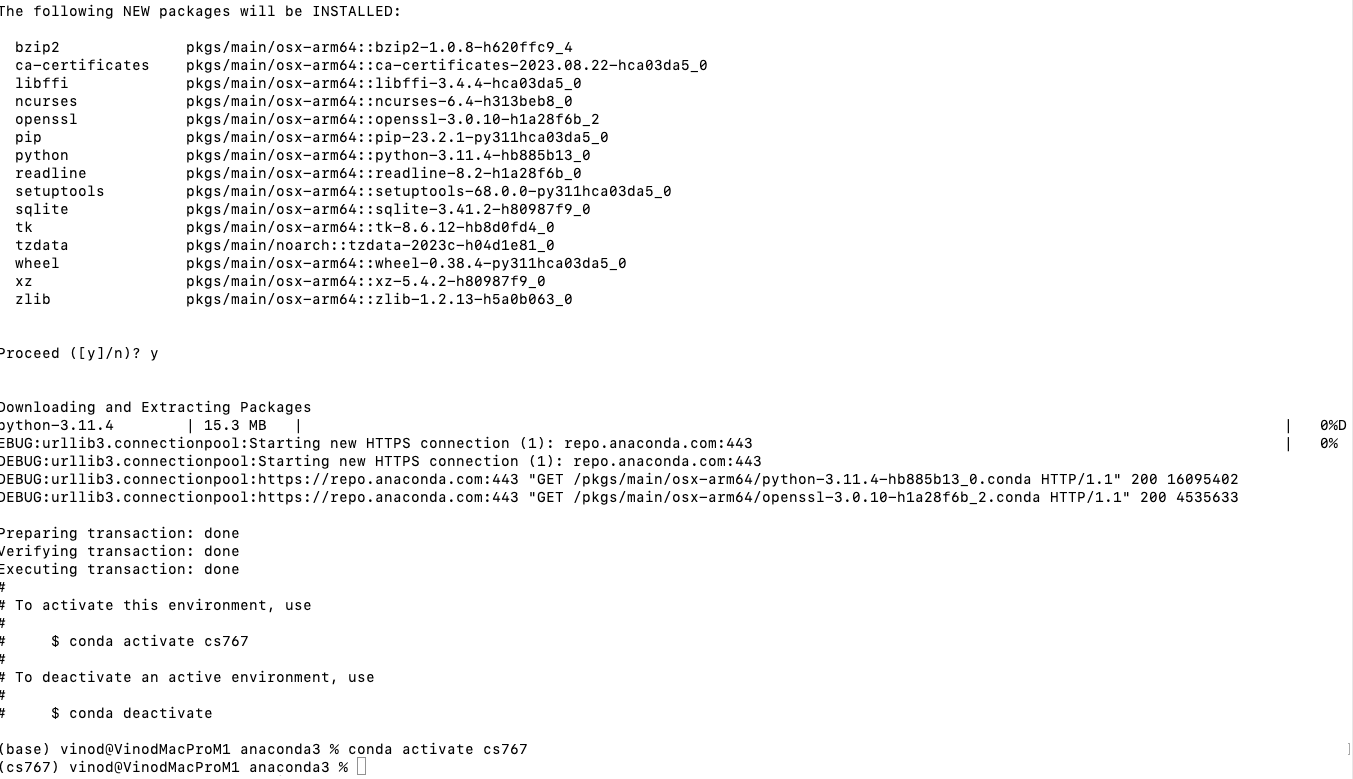

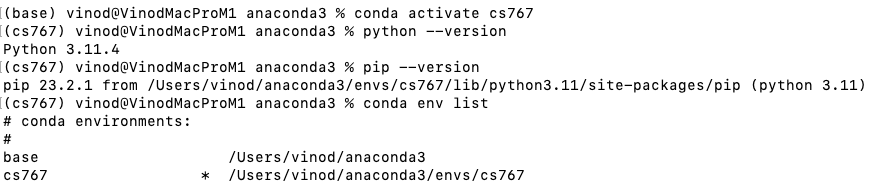

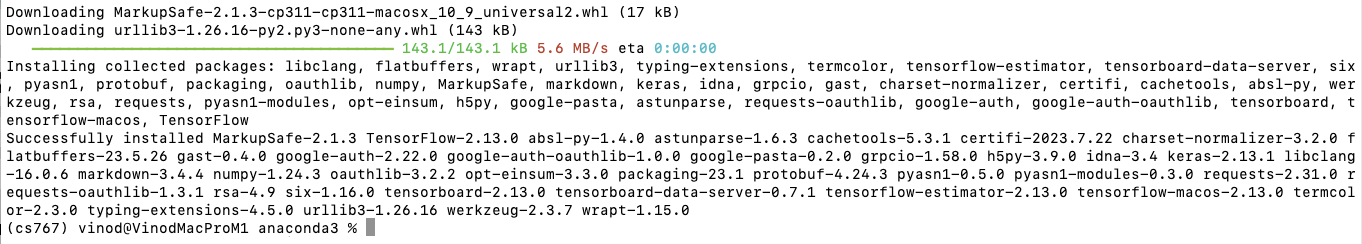

problem 2: Tensorflow installed into the venv of cs767

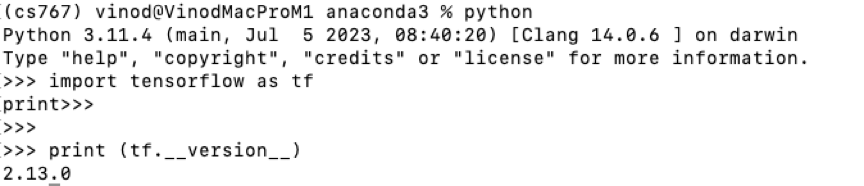

problem 3: on local macbook jupyter notebook

In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.13.0


In [20]:
t1=tf.constant([[7,8,9],[1,2,3]])

In [21]:
t2=tf.constant([[11,12,13],[21,22,23]])

In [6]:
t3=t1+t2
print(t3)

tf.Tensor(
[[18 20 22]
 [22 24 26]], shape=(2, 3), dtype=int32)


In [7]:
t4 = tf.add(t1,t2)
print(t4)

tf.Tensor(
[[18 20 22]
 [22 24 26]], shape=(2, 3), dtype=int32)


Problem 4: on local macbook cpu_vs_gpu_test

In [8]:
import tensorflow as tf
import timeit

In [9]:
dir(timeit)

['Timer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_globals',
 'default_number',
 'default_repeat',
 'default_timer',
 'dummy_src_name',
 'gc',
 'itertools',
 'main',
 'reindent',
 'repeat',
 'sys',
 'template',
 'time',
 'timeit']

In [13]:
# returns whether TensorFlow was built with CUDA (GPU) support
tf.test.is_built_with_cuda()

False

In [14]:
# returns a list of available physical GPUs
tf.config.list_physical_devices("GPU")

[]

In [15]:
# returns the names of physical GPUs
tf.test.gpu_device_name()

''

a test case

In [16]:
# initialize random matrices on CPU and GPU
with tf.device("/CPU:0"):
    cpu_m1 = tf.random.normal(shape=[10000, 1000])
    cpu_m2 = tf.random.normal(shape=[1000, 5000])
    print(cpu_m1.device, "\n", cpu_m2.device, "\n"*2)

with tf.device("/GPU:0"):
    gpu_m1 = tf.random.normal([10000, 1000])
    gpu_m2 = tf.random.normal([1000, 5000])
    print(gpu_m1.device, "\n", gpu_m2.device)

/job:localhost/replica:0/task:0/device:CPU:0 
 /job:localhost/replica:0/task:0/device:CPU:0 


/job:localhost/replica:0/task:0/device:CPU:0 
 /job:localhost/replica:0/task:0/device:CPU:0


In [17]:
# perform matrix multiplication test
def cpu_test():
    with tf.device("/CPU:0"):
        res = tf.matmul(cpu_m1, cpu_m2)
    return res

def gpu_test():
    with tf.device("/GPU:0"):
        res = tf.matmul(gpu_m1, gpu_m2)
    return res

if __name__ == "__main__":
    cpu_time = timeit.timeit(cpu_test, number=50)
    gpu_time = timeit.timeit(gpu_test, number=50)
    print(f"CPU run time: {cpu_time}\nGPU run time: {gpu_time}")

CPU run time: 17.203562167007476
GPU run time: 18.2123404580052


Problem 5: on Colab  cpu_vs_gpu_test

Screenshot from colab without GPU

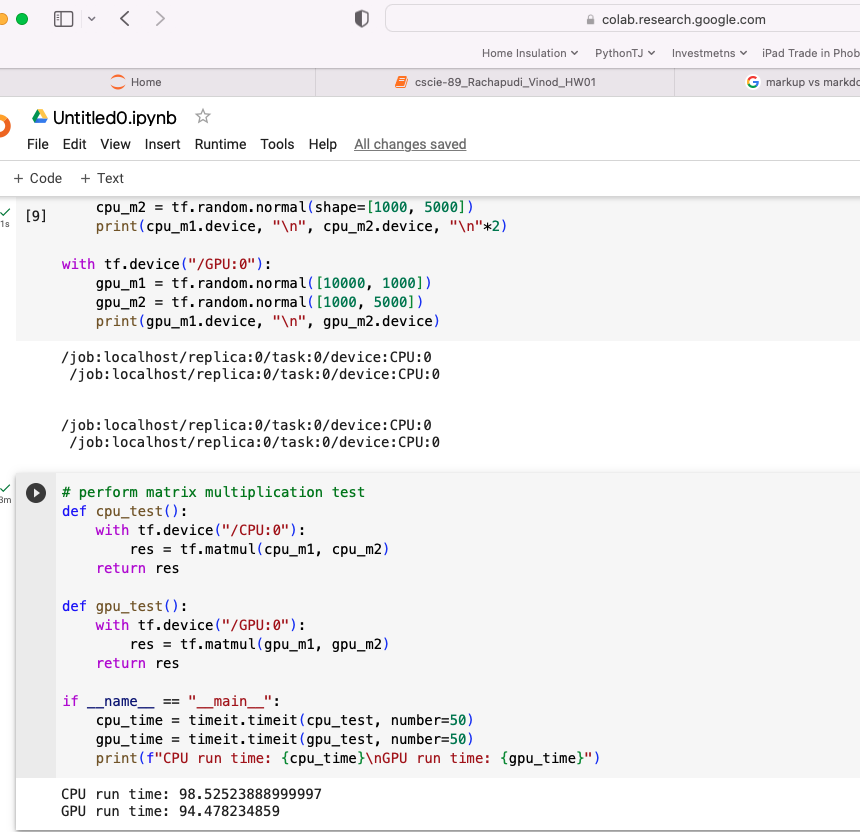

Screenshot from colab with GPU

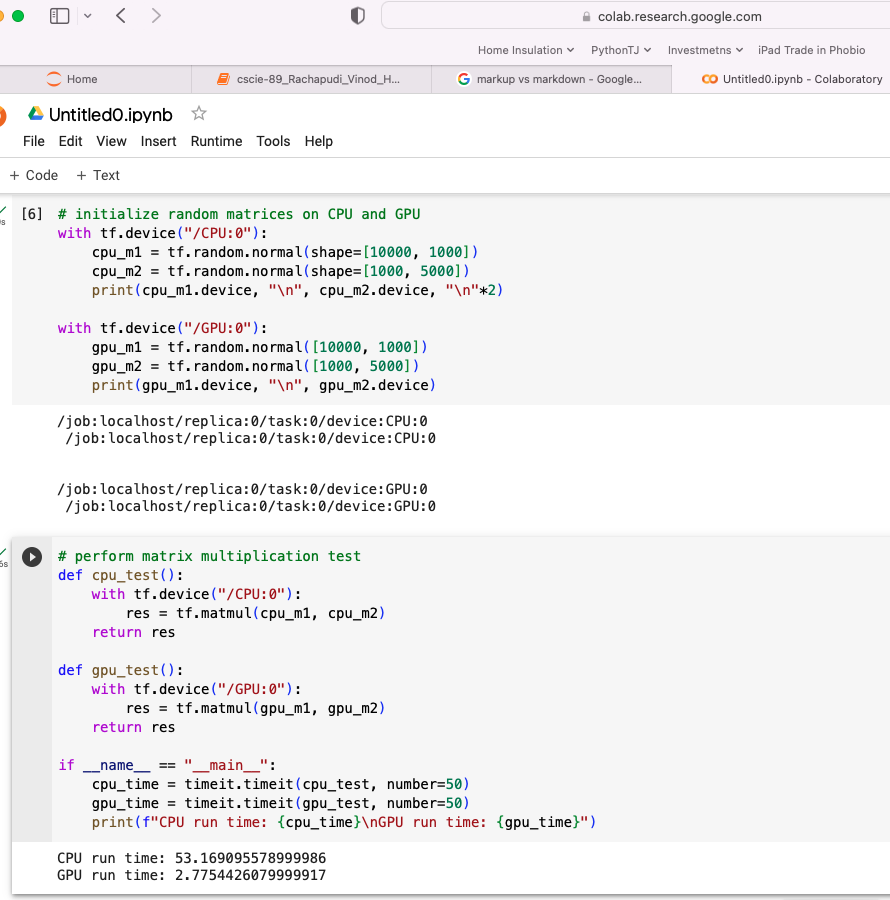

Problem 6

Normal Implementation of Logical Functions OR, AND and NOT.

In [22]:
def logicaland(x1, x2):
    g = -30 + (20 * x1) + (20 * x2)
    if g > 4.6:
        return 1
    else:
        return 0

print("x1", "x2", "h(x)")
print("----- ----")
print(0," ", 0," ",logicaland(0,0))
print(0," ",1," ",logicaland(0,1))
print(1," ",0," ",logicaland(1,0))
print(1," ",1," ",logicaland(1,1))

x1 x2 h(x)
----------
0   0   0
0   1   0
1   0   0
1   1   1


In [33]:
def logicalor(x1, x2):
    g = -10 + (20  * x1) + (20 * x2)
    if g > 4.6:
        return 1
    else:
        return 0

print("x1", "x2", "h(x)")
print("----- ----")
print(0," ", 0," ",logicalor(0,0))
print(0," ", 1," ",logicalor(0,1))
print(1," ", 0," ",logicalor(1,0))
print(1," ", 1," ",logicalor(1,1))

x1 x2 h(x)
----- ----
0   0   0
0   1   1
1   0   1
1   1   1


In [28]:
def logicalnot(x1):
    g = 10 - (20  * x1) 
    if g > 4.6:
        return 1
    else:
        return 0
print("x1", "h(x)")
print("----------")
print(0," ",logicalnot(0))
print(1," ",logicalnot(1))

x1 h(x)
----------
0   1
1   0


TensorFlow Implementation of Logical Functions OR, AND and NOT.

In [34]:
def tflogicaland(x1, x2):
    g = tf.constant(-30.0) + (tf.constant(20.0) * x1) + (tf.constant(20.0) * x2)
    if g > tf.constant(4.6):
        return 1
    else:
        return 0
zero=tf.constant(0.0)
one=tf.constant(1.0)

print("x1", "x2", "h(x)")
print("----- ----")
print(0," ", 0," ",tflogicaland(zero,zero))
print(0," ", 1," ",tflogicaland(zero,one))
print(1," ", 0," ",tflogicaland(one,zero))
print(1," ", 1," ",tflogicaland(one,one))

x1 x2 h(x)
----- ----
0   0   0
0   1   0
1   0   0
1   1   1


In [35]:
def tflogicalor(x1, x2):
    g = tf.constant(-10.0) + (tf.constant(20.)  * x1) + (tf.constant(20.0) * x2)
    if g > tf.constant(4.6):
        return 1
    else:
        return 0
zero=tf.constant(0.0)
one=tf.constant(1.0)

print("x1", "x2", "h(x)")
print("----- ----")
print(0," ", 0," ",tflogicalor(zero,zero))
print(0," ", 1," ",tflogicalor(zero,one))
print(1," ", 0," ",tflogicalor(one,zero))
print(1," ", 1," ",tflogicalor(one,one))

x1 x2 h(x)
----- ----
0   0   0
0   1   1
1   0   1
1   1   1


In [36]:
def tflogicalnot(x1):
    g = tf.constant(10.0) - (tf.constant(20.0)  * x1) 
    if g > tf.constant(4.6):
        return 1
    else:
        return 0
        
zero=tf.constant(0.0)
one=tf.constant(1.0)

print("x1", "h(x)")
print("----- ----")
print(0," ",tflogicalnot(zero))
print(1," ",tflogicalnot(one))

x1 h(x)
----- ----
0   1
1   0
